In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from keras.layers import Layer, Dense, Softmax
from keras import backend as K
from keras import Sequential

In [2]:
class RBFLayer(Layer):
    '''
    Una clase de capa para utilizar RBF(Radial Basis Function) en un modelo de Keras.
    
    Parameters
    ----------
    
    :units int:
        Cantidad de unidades de la capa.
    
    :gamma float:
        Parametro de influencia en la Función de base radial.
    
    '''
    
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff,2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [16]:
# Definición de la red RBF
model = Sequential()
model.add(Dense(20, input_shape=(5,),activation = 'relu'))
model.add(RBFLayer(20, 0.5, input_shape=(20,)))
model.add(Dense(1, input_shape=(20,), activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
data = pd.read_csv('training.csv', index_col = 0)

In [6]:
data

,target,connected,sum_of_papers,sum_of_neighbors,log_secundary_neighbors,lenght_short_path,clustering_index_sum,cos_sim
source,,,,,,,,
Michael Barnett 0001,Christian Lengauer,1.0,57,25,10.244236,1.0,0.320879,0.986788
Mark Vriesenga,Kalman Peleg,1.0,11,8,7.544332,1.0,1.400000,0.999958
Matt Blaze,Joan Feigenbaum,1.0,78,69,13.227696,1.0,0.314291,0.842274
Majid Mirmehdi,John F. Haddon,1.0,35,26,9.679719,1.0,0.644946,0.999856
Richard Durbin,Erik L. L. Sonnhammer,1.0,19,25,10.301928,1.0,1.115789,0.510218
...,...,...,...,...,...,...,...,...
Tetsuya Iwasaki,Yoshihiro Sekiguchi,0.0,14,9,5.877736,8.0,1.142857,-0.202610
Quin Cai,Mary Sheeran,0.0,15,9,7.408531,8.0,1.066667,0.587141
Myong-Soon Park,Philipp Hoschka,0.0,30,15,7.859413,6.0,0.179487,0.127577


In [7]:
data_test = pd.read_csv('test.csv', index_col = 0)

In [8]:
data_test

,target,connected,sum_of_papers,sum_of_neighbors,log_secundary_neighbors,lenght_short_path,clustering_index_sum,cos_sim
source,,,,,,,,
Hideaki Takanobu,Kayoko Ohtsuki,1.0,17,34,10.757477,1.0,1.407389,0.999543
Joseph Douglas Horton,Alejandro López-Ortiz,1.0,26,25,11.075040,1.0,0.752381,0.679661
Siddhartha R. Dalal,Ashish Jain,1.0,19,11,7.494430,1.0,0.800000,0.914322
Laurence Melloul,Armando Fox,1.0,21,16,8.034955,1.0,1.153846,0.163811
Riccardo Bettati,Wei Zhao 0001,1.0,76,25,9.294498,1.0,1.109524,0.906554
...,...,...,...,...,...,...,...,...
Florian Schiel,Walt Truszkowski,0.0,21,10,5.023881,9.0,0.300000,-0.080415
Goffredo Haus,Mizuho Iwaihara,0.0,10,9,7.339538,6.0,0.321429,-0.092863
Joe L. Armstrong,George T. Duncan,0.0,13,0,0.000000,NaN,0.000000,-0.364298


In [9]:
# Variables a considerar, ignoramos el shortest_path_length
variables = data[['sum_of_papers', 'sum_of_neighbors',
       'log_secundary_neighbors', 'clustering_index_sum','connected', 'cos_sim']]

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [11]:
X_train = scaler.fit_transform(data[['sum_of_papers', 'sum_of_neighbors',
       'log_secundary_neighbors', 'clustering_index_sum', 'cos_sim']].values)
y_train = data['connected'].values

In [12]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test = scaler.fit_transform(data_test[['sum_of_papers', 'sum_of_neighbors',
       'log_secundary_neighbors', 'clustering_index_sum', 'cos_sim']].values)
y_test = data_test['connected'].values

In [13]:
X_train_nb = data[['sum_of_papers', 'sum_of_neighbors',
       'log_secundary_neighbors', 'clustering_index_sum', 'cos_sim']].values

In [14]:
from sklearn.model_selection import RandomizedSearchCV
# Definición de modelos
modelos_nombres = ["Decision Tree",
                   "SVM - Linear Kernel",
                   "SVM - RBF Kernel",
                   "K-Neighbors",
                   "Naive Bayes",
                   "Multi-Layer Perceptron"
                  ]
modelos = [RandomizedSearchCV(#Decision Tree
                estimator = DecisionTreeClassifier(),
                param_distributions =
                {
                   "criterion": ["entropy","gini"],
                   "max_depth":[2,4,6, None],
                   "min_samples_leaf":[60,70,80,90,100,110,120],
                   "max_features":["auto","sqrt"]
                },
                n_iter=60,
                cv=10,
                verbose=0,
                random_state=42,
                n_jobs=-1),
           RandomizedSearchCV(#SVM - Linear 
                estimator = LinearSVC(),
                param_distributions =
                {
                   "C" : [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 1.0],
                   "dual": [False]
                },
                n_iter=30,
                cv=10,
                verbose=0,
                random_state=42,
                n_jobs=-1),
            RandomizedSearchCV(#SVM - RBF  - Es el optimo anterior, toma mucho tiempo ejecutarlo.
                estimator = SVC(),
                param_distributions =
                {
                   "kernel": ["rbf"],
                   "C" : [5.3],
                   "gamma" : ['auto'],
                   "class_weight" : [None]
                },
                n_iter=30,
                cv=10,
                verbose=0,
                random_state=42,
                n_jobs=-1),
            RandomizedSearchCV(#K-Neighbors
                estimator = KNeighborsClassifier(),
                param_distributions =
                {
                   "n_neighbors": list(range(28,50)),
                   "weights" : ['uniform', 'distance'],
                   "metric" : ['minkowski'],
                   "p" : [1,2,3,4,5]
                },
                n_iter=100,
                cv=10,
                verbose=0,
                random_state=42,
                n_jobs=-1),
           GaussianNB(),
           MLPClassifier()#,
           #BaggingClassifier(n_jobs=-1)
          ]

In [15]:
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_fscore_support

resultados = []

bagging = np.zeros_like(y_test)

for i, modelo in enumerate(modelos):
    print(modelos_nombres[i])
    print(str(modelo))
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    bagging += y_pred.reshape(len(y_pred))
    try:
        bp = modelo.best_params_
        print("Mejores parámetros en CV Randomized Search:")
        print(bp)
    except:
        pass #Cuando no es CV
    print(classification_report(y_test, y_pred, target_names=['Colaboro', 'No colaboro']))
    p, r, f, _ = precision_recall_fscore_support(y_test, y_pred, average = 'weighted')
    resultados.append([modelos_nombres[i],
                       accuracy_score(y_test, y_pred),
                       p,
                       r,
                       f,
                       mean_squared_error(y_test, y_pred)])

Decision Tree
RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=60,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 4, 6, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [60, 70, 80, 90,
                                                             100, 110, 120]},
                   random_state=42)
Mejores parámetros en CV Randomized Search:
{'min_samples_leaf': 60, 'max_features': 'auto', 'max_depth': None, 'criterion': 'entropy'}
              precision    recall  f1-score   support

    Colaboro       0.80      0.94      0.86     20000
 No colaboro       0.91      0.75      0.82     18103

    accuracy                           0.85     38103
   macro avg       0.86      0.84      0.84     38103
weighted avg       0.86      0.85      0.84     38103

SVM - Linea

/home/mario/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 8 is smaller than n_iter=30. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros en CV Randomized Search:
{'dual': False, 'C': 0.0001}
              precision    recall  f1-score   support

    Colaboro       0.79      0.91      0.84     20000
 No colaboro       0.88      0.74      0.80     18103

    accuracy                           0.83     38103
   macro avg       0.83      0.82      0.82     38103
weighted avg       0.83      0.83      0.82     38103

SVM - RBF Kernel
RandomizedSearchCV(cv=10, estimator=SVC(), n_iter=30, n_jobs=-1,
                   param_distributions={'C': [5.3], 'class_weight': [None],
                                        'gamma': ['auto'], 'kernel': ['rbf']},
                   random_state=42)


/home/mario/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=30. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros en CV Randomized Search:
{'kernel': 'rbf', 'gamma': 'auto', 'class_weight': None, 'C': 5.3}
              precision    recall  f1-score   support

    Colaboro       0.79      0.95      0.86     20000
 No colaboro       0.93      0.72      0.81     18103

    accuracy                           0.84     38103
   macro avg       0.86      0.83      0.83     38103
weighted avg       0.85      0.84      0.84     38103

K-Neighbors
RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'metric': ['minkowski'],
                                        'n_neighbors': [28, 29, 30, 31, 32, 33,
                                                        34, 35, 36, 37, 38, 39,
                                                        40, 41, 42, 43, 44, 45,
                                                        46, 47, 48, 49],
                                        'p': [1, 2, 3, 4, 5],
        

ValueError: in user code:

    /home/mario/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/mario/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/mario/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/mario/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/mario/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/mario/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/mario/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /home/mario/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/mario/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 4 but received input with shape (None, 5)


In [17]:
model.fit(X_train, y_train, epochs=100, verbose=False)
y_pred = np.round(model.predict(X_test))
bagging += y_pred.reshape(len(y_pred))
loss,accuracy = model.evaluate(X_test, y_test,)
print(f"RBF Network Accuracy: {accuracy}")
p, r, f, _ = precision_recall_fscore_support(y_test, y_pred, average = 'weighted')
resultados.append(["RBF Network",
                    accuracy_score(y_test, y_pred),
                    p,
                    r,
                    f,
                    mean_squared_error(y_test, y_pred)])

1191/1191 [==============================] - 1s 983us/step - loss: 0.4177 - accuracy: 0.8349
RBF Network Accuracy: 0.83492112159729


In [18]:
y_pred = bagging > 3.0
p, r, f, _ = precision_recall_fscore_support(y_test, y_pred, average = 'weighted')
resultados.append(["Bagging",
                    accuracy_score(y_test, y_pred),
                    p,
                    r,
                    f,
                    mean_squared_error(y_test, y_pred)])

In [19]:
pd.DataFrame(resultados, columns=['Clasificador', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Squared Error'])

,Clasificador,Accuracy,Precision,Recall,F1 Score,Squared Error
0,Decision Tree,0.846311,0.855954,0.846311,0.844447,0.153689
1,SVM - Linear Kernel,0.825316,0.831622,0.825316,0.823647,0.174684
2,SVM - RBF Kernel,0.839120,0.854624,0.839120,0.836261,0.160880
3,K-Neighbors,0.841194,0.850748,0.841194,0.839248,0.158806
4,Naive Bayes,0.852243,0.859372,0.852243,0.850834,0.147757
5,Multi-Layer Perceptron,0.841220,0.854624,0.841220,0.838711,0.158780
6,RBF Network,0.834921,0.848982,0.834921,0.832162,0.165079
7,Bagging,0.842900,0.855496,0.842900,0.840544,0.157100


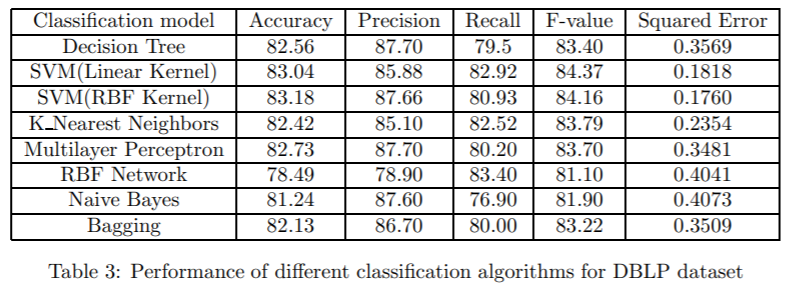